# Day 1

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

## Airline cost

In [5]:
df = pd.read_csv('./data/airline cost new.csv')
x = df['num_pass']
y = df['cost']
df.head()

,num_pass,cost
0,61,4280
1,63,4080
2,67,4420
3,69,4170
4,70,4480


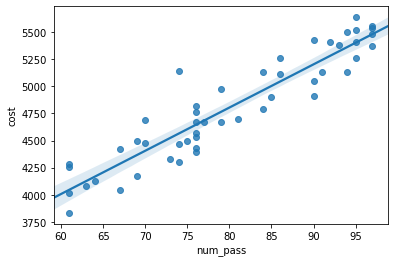

In [8]:
ax = sns.regplot(data=df,x='num_pass',y='cost')

In [6]:
xc = sm.add_constant(x)
# Ordinary least square
lr = sm.OLS(y,xc).fit()
lr.summary()

c:\users\p s v\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     302.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           4.23e-22
Time:                        12:34:02   Log-Likelihood:                -323.87
No. Observations:                  49   AIC:                             651.7
Df Residuals:                      47   BIC:                             655.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1612.9763    185.831      8.680      0.000    1239.133    1986.820
num_pass      39.8941      2.295     17.383      0.000      35.277      44.511
==============================================================================
Omnibus:                        3.612   Durbin-Watson:                   2.624
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                2.700
Skew:                           0.556   Prob(JB):                        0.259
Kurtosis:                       3.296   Cond. No.                         574.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**P>|t| = 0**
- Which means the null hypothesis is incorrect and we reject it.

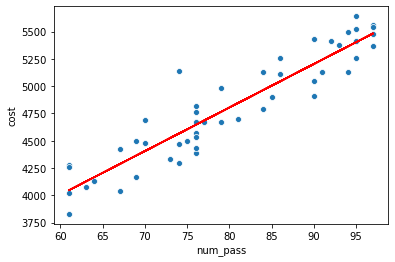

In [15]:
y_ = lr.predict(xc)
sns.scatterplot(x,y)
plt.plot(x,y_,color='r')

## Virginia Semiconductors

In [16]:
vs = pd.read_csv('./data/virginia semiconductors.csv')
vs.head()

,Size_of_Purchase,Company_Size,%Imports,Distance,Central_Purchaser
0,27.9,25.6,41,18,0
1,89.6,109.8,16,75,0
2,12.8,39.4,29,14,0
3,34.9,16.7,31,117,0
4,408.6,278.4,14,209,1


In [ ]:
X = vs.drop('Size_of_Purchase',axis=1)
y = vs['Size_of_Purchase']

In [21]:
y

0      27.9
1      89.6
2      12.8
3      34.9
4     408.6
5     173.5
6     105.2
7     235.0
8     390.0
9     382.7
10     84.6
11    101.4
12     27.6
13    234.8
14    309.8
15    294.6
16    311.0
Name: Size_of_Purchase, dtype: float64

In [29]:
xc = sm.add_constant(X)
lr = sm.OLS(y,xc).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Size_of_Purchase   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     55.00
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.28e-07
Time:                        13:06:54   Log-Likelihood:                -82.436
No. Observations:                  17   AIC:                             174.9
Df Residuals:                      12   BIC:                             179.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.6686     30.107     -0.122      0.905     -69.266      61.929
Company_Size          1.2687      0.200      6.355      0.000       0.834       1.704
%Imports              0.0508      0.865      0.059      0.954      -1.834       1.936
Distance             -0.2204      0.256     -0.860      0.407      -0.779       0.338
Central_Purchaser   127.3502     23.880      5.333      0.000      75.321     179.380
==============================================================================
Omnibus:                        2.223   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.588
Skew:                          -0.727   Prob(JB):                        0.452
Kurtosis:                       2.640   Cond. No.                         542.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- $Prob (F-statistic):	1.28e-07 < \alpha$

    It shows that Regression line is valid.
    
- $P>|t|$

    If probability is higher than the $\alpha$ then the feature is not important. Therefore the features like `const` `Imports` `Distance` having higher P values are not significant. We can drop feature by feature to see the change in the results.

In [30]:
# Remove constant
# xc = sm.add_constant(X)
lr = sm.OLS(y,X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Size_of_Purchase   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              181.9
Date:                Mon, 07 Oct 2019   Prob (F-statistic):                    2.86e-11
Time:                        13:09:27   Log-Likelihood:                         -82.447
No. Observations:                  17   AIC:                                      172.9
Df Residuals:                      13   BIC:                                      176.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Company_Size          1.2766      0.182      7.031      0.000       0.884       1.669
%Imports             -0.0361      0.471     -0.077      0.940      -1.053       0.981
Distance             -0.2410      0.184     -1.307      0.214      -0.640       0.158
Central_Purchaser   126.0227     20.429      6.169      0.000      81.888     170.157
==============================================================================
Omnibus:                        2.117   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.525
Skew:                          -0.709   Prob(JB):                        0.466
Kurtosis:                       2.623   Cond. No.                         346.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Remove %Import, as this variable was the worst
lr = sm.OLS(y,X.drop('%Imports',axis=1)).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Size_of_Purchase   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              261.1
Date:                Mon, 07 Oct 2019   Prob (F-statistic):                    1.61e-12
Time:                        13:10:26   Log-Likelihood:                         -82.450
No. Observations:                  17   AIC:                                      170.9
Df Residuals:                      14   BIC:                                      173.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Company_Size          1.2688      0.145      8.739      0.000       0.957       1.580
Distance             -0.2381      0.174     -1.369      0.193      -0.611       0.135
Central_Purchaser   126.0892     19.673      6.409      0.000      83.895     168.283
==============================================================================
Omnibus:                        2.209   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.565
Skew:                          -0.723   Prob(JB):                        0.457
Kurtosis:                       2.653   Cond. No.                         343.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Remove Distance, as this variable was the worst
lr = sm.OLS(y,X.drop(columns=['%Imports',' '])).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Size_of_Purchase   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              369.2
Date:                Mon, 07 Oct 2019   Prob (F-statistic):                    1.75e-13
Time:                        13:11:49   Log-Likelihood:                         -83.518
No. Observations:                  17   AIC:                                      171.0
Df Residuals:                      15   BIC:                                      172.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Company_Size          1.1558      0.123      9.408      0.000       0.894       1.418
Central_Purchaser   123.8984     20.170      6.143      0.000      80.907     166.890
==============================================================================
Omnibus:                        2.485   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                1.974
Skew:                          -0.758   Prob(JB):                        0.373
Kurtosis:                       2.303   Cond. No.                         299.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If a client got `Central_Purchaser`  then it is possible to get `123.8984` sales size more.

In [36]:
X.describe()

,Company_Size,%Imports,Distance,Central_Purchaser
count,17.000000,17.000000,17.000000,17.000000
mean,103.282353,23.941176,62.823529,0.588235
std,74.251298,14.579397,52.883404,0.507300
min,6.800000,5.000000,7.000000,0.000000
25%,39.400000,16.000000,18.000000,0.000000
50%,98.400000,20.000000,73.000000,1.000000
75%,132.600000,31.000000,89.000000,1.000000
max,278.400000,53.000000,209.000000,1.000000
